# Using The API
## Setup
```
conda create -n CWT-API -c conda-forge -c jasonb87 esgf-compute-api
```

For this demo we will also install uvcdat
```
source activate CWT-API 
conda install -c conda-forge -c uvcdat uvcdat
```
We are also using the server that we just just setup


In [1]:
# First we need to import a few things
from esgf import WPS
from esgf import Variable, NamedParameter

In [2]:
# Now let's connect to our server
wps = WPS('http://0.0.0.0:8000/wps/',username="wps_test",password="Abc123!!")

In [3]:
# Let's inspect which services are available on this server
for proc in wps:
    print proc.name

cdat.aggregate
cdat.averager
ophidia.averager
ophidia.ensemble
test.echo
test.passthrough
test.sleep


In [4]:
# let's use a variable in the file we are serving locally via the server
T = Variable('/ServedData/famipc5_ne30_v0.3_00003.cam.h0.1979-01_regrid.nc', 'T')

In [5]:
# Now let's select the process we want to use
process = wps.get_process('cdat.averager')

In [7]:
# Let's ask the server to average T over lat/lon
#process.execute(inputs=[T], parameters=[NamedParameter('axes','longitude','latitude')])
process.execute(inputs=[T], axes='longitude|latitude')

In [8]:
# Let's look at the result
print process.status
print process.message

ProcessSucceeded
PyWPS Process cdat.averager successfully calculated


In [9]:
# Where is the result?
print process.output.uri
print process.output.var_name

http://0.0.0.0:8080/thredds/dodsC/test/4973291c-4a1a-41bf-b0fb-37f6c7039970.nc
T_avg_longitude_latitude


In [10]:
# Ok we could use this further in wps or we can use it locally
# let's load the file locally
import cdms2
f=cdms2.open(process.output.uri)

In [11]:
# Let's locate the variable
T_avg = f[process.output.var_name]
print T_avg.shape

(1, 30)


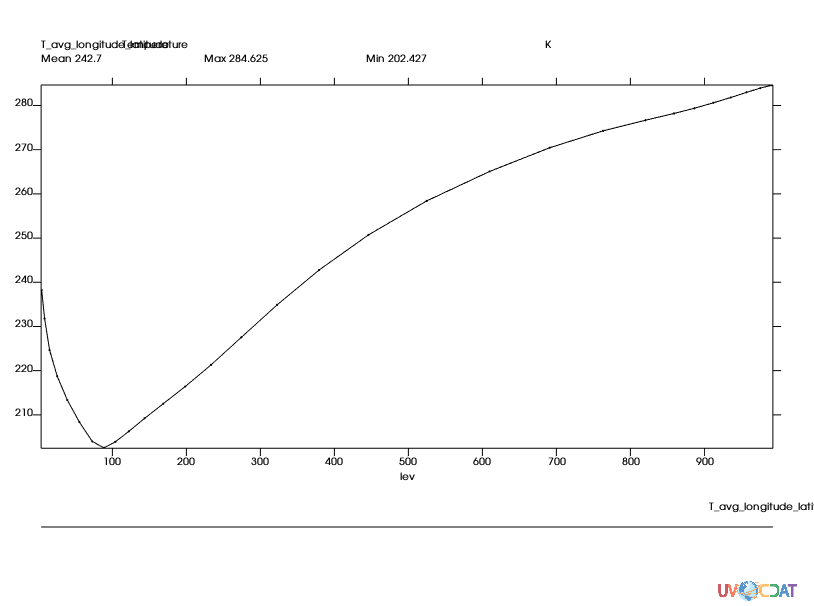

In [12]:
# And let's plot it for fun
import vcs
x=vcs.init()
x.plot(T_avg[0],bg=True)